In [20]:
import thinkbayes
import seaborn as sns

In [24]:
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 8)

Populating the interactive namespace from numpy and matplotlib


C:\Programming\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['beta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# 두 차원
___
## 1. 페인트볼 게임

>- 30피트 by 50피트 실내 경기장에서 페인트볼 게임 중
>- 상대편의 페인트 자국은 실내 경기장의 왼쪽 아래부터 각각 15, 16, 18, 21피트 거리에 나 있음
>- 상대 편의 위치는 어디쯤으로 추정되는지

![](figures/patinball.png)

- 위 그림을 참조, 총을 쏜 사람의 좌표는 $\alpha$와 $\beta$로 표기하고, 페인트자국의 위치는 $x$, 발사각은 $\theta$로 표기

___
## 2.  스윗

- 스윗은 각 가설의 집합(여기에서는 $\alpha$와 $\beta$의 조합으로 정의

In [5]:
class Paintball(thinkbayes.Suite, thinkbayes.Joint):
    
    def __init__(self, alphas, betas, locations):
        self.locations = locations
        pairs = [(alpha, beta) for alpha in alphas for beta in betas]
        thinkbayes.Suite.__init__(self, pairs)

- `thinkbayes.Joint` 클래스는 후술
- `location`은 $x$가 발생할 수 있는 모든 장소의 리스트로 Likelihood가 사용 예정

In [6]:
alphas = range(0, 31)
betas = range(1, 51)
locations = range(0, 31)
suite = Paintball(alphas, betas, locations)

In [7]:
suite.d

{(0, 1): 0.0006451612903225806,
 (0, 2): 0.0006451612903225806,
 (0, 3): 0.0006451612903225806,
 (0, 4): 0.0006451612903225806,
 (0, 5): 0.0006451612903225806,
 (0, 6): 0.0006451612903225806,
 (0, 7): 0.0006451612903225806,
 (0, 8): 0.0006451612903225806,
 (0, 9): 0.0006451612903225806,
 (0, 10): 0.0006451612903225806,
 (0, 11): 0.0006451612903225806,
 (0, 12): 0.0006451612903225806,
 (0, 13): 0.0006451612903225806,
 (0, 14): 0.0006451612903225806,
 (0, 15): 0.0006451612903225806,
 (0, 16): 0.0006451612903225806,
 (0, 17): 0.0006451612903225806,
 (0, 18): 0.0006451612903225806,
 (0, 19): 0.0006451612903225806,
 (0, 20): 0.0006451612903225806,
 (0, 21): 0.0006451612903225806,
 (0, 22): 0.0006451612903225806,
 (0, 23): 0.0006451612903225806,
 (0, 24): 0.0006451612903225806,
 (0, 25): 0.0006451612903225806,
 (0, 26): 0.0006451612903225806,
 (0, 27): 0.0006451612903225806,
 (0, 28): 0.0006451612903225806,
 (0, 29): 0.0006451612903225806,
 (0, 30): 0.0006451612903225806,
 (0, 31): 0.0006451

___
## 3. 삼각법(Trigonometry)

- 페인트자국이 남을 $x$ location에 대한 우도 함수가 필요
- 상대방이 모든 각도로 사격할 가능성이 있을 때, 경우의 수는 $\alpha$에서 가장 높고, 멀어질수록 낮아짐
- 이를 삼각법으로 표현하면 다음과 같이 표기할 수 있음:
$$x - \alpha = \beta tan \theta$$
- 이를 $\theta$에 대한 식으로 풀면:
$$\theta =  than^{-1}(\frac{x-\alpha}{\beta})$$
- 따라서 특정 location에서 $\theta$를 구하는 게 가능해짐
- $\theta$에 대한 방적식을 미분하면 아래와 같이 표기 가능:
$$\frac{dx}{d\theta} = \frac{\beta}{cos^2\theta}$$

- 이 미분식은 총격속도에 대한 것으로 벽의 주어진 점을 맞출 확률은 총격속도의 역수에 비례
- 만약 총을 쏜 사람과 벽의 위치 좌표를 안다면 총격 속도를 계산 가능

In [13]:
def StrafingSpeed(alpha, beta, x):
    theta = math.atan2(x - alpha, beta)
    speed = beta / math.cos(theta)**2
    return speed

- $\alpha$와 $\beta$는 총을 쏜 사람의 좌표고, $x$는 벽에 난 자국의 위치임
- 결과는 $\theta$에 대한 $x$의 미분값을 반환

___
- 벽의 어떤 위치를 맞출 확률을 나타내는 Pmf는 다음과 같이 계산 가능

In [16]:
def MakeLocationPmf(alpha, beta, locations):
    pmf = thinkbayes.Pmf()
    for x in locations:
        prob = 1.0 / StrafingSpeed(alpha, beta, x)
        pmf.Set(x, prob)
        
    pmf.Normalize()
    return pmf        

In [19]:
beta10 = MakeLocationPmf(alpha = 10, beta = 10, locations = locations)
beta20 = MakeLocationPmf(alpha = 10, beta = 20, locations = locations)
beta40 = MakeLocationPmf(alpha = 10, beta = 40, locations = locations)

Text(0.5,1,'PMF of locations given alpha = 10\n')

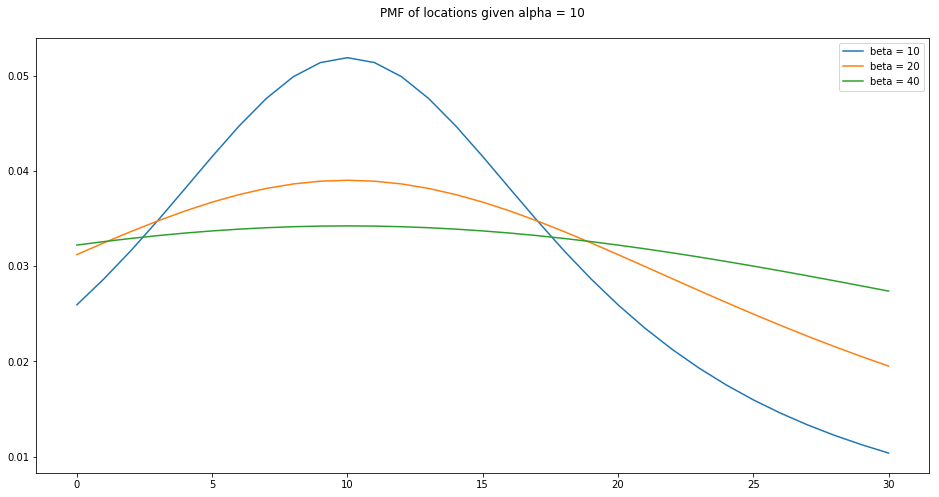

In [25]:
sns.lineplot(x = list(beta10.d.keys()), y = list(beta10.d.values()), label = 'beta = 10')
sns.lineplot(x = list(beta20.d.keys()), y = list(beta20.d.values()), label = 'beta = 20')
sns.lineplot(x = list(beta40.d.keys()), y = list(beta40.d.values()), label = 'beta = 40')
plt.title('PMF of locations given alpha = 10\n')

___
## 4. 우도
-`MakeLocationPmf`를 사용해서 $x$ location 값에 대한 우도를 계산

In [26]:
def Likelihood(self, data, hypo):
    alpha, beta = hypo
    x = data
    pmf = MakeLocationPmf(alpha, beta, self.locations)
    like = pmf.Prob(x)
    return like

- $\alpha$와 $\beta$는 상대방에 대한 가설(좌표)이고, $x$는 페인트 자국 위치임
- pmf는 ($\alpha$, $\beta$)에 대한 확률이 들어 있음
- 스윗을 갱신할 때는 `UpdateSet`을 사용하면 됨
```python
suite.UpdateSet([15, 16, 18, 21])
```

___
## 5. 결합분포